In [181]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [183]:
df = pd.read_csv('weight-height.csv')

In [185]:
df.drop(columns=['Gender'],inplace=True)

In [187]:
df.head()

,Height,Weight
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


In [189]:
df.columns=['Weight','Height']

In [191]:
df.head()

,Weight,Height
0,73.847017,241.893563
1,68.781904,162.310473
2,74.110105,212.740856
3,71.730978,220.042470
4,69.881796,206.349801


Text(0, 0.5, 'Height')

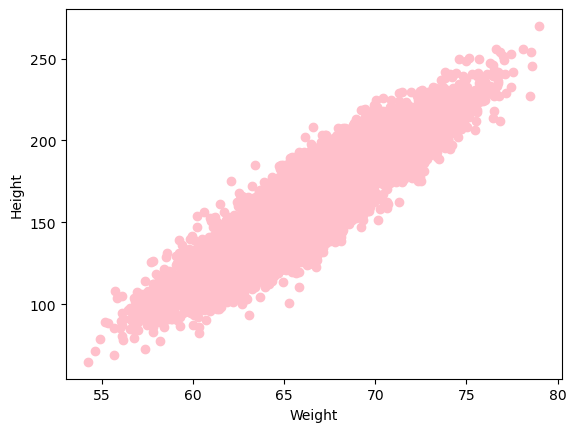

In [193]:
# scatter plot
plt.scatter(df['Weight'],df['Height'],color='pink')
plt.xlabel("Weight")
plt.ylabel("Height")

In [194]:
## Correlation
df.corr()

,Weight,Height
Weight,1.000000,0.924756
Height,0.924756,1.000000


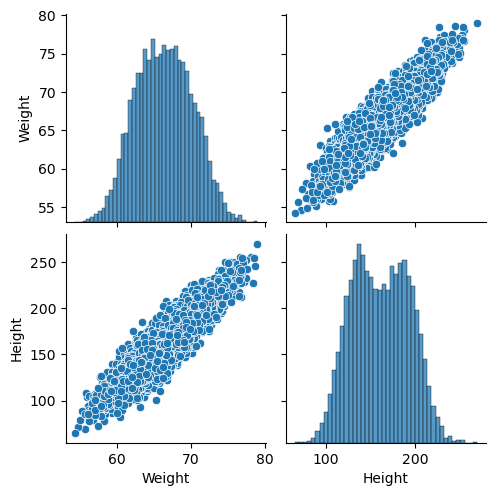

In [195]:
## Seaborn for visualization
import seaborn as sns
sns.pairplot(df)

In [196]:
## Independent and Dependent features
X = df[['Weight']]   ## Independent features should be data frame or 2 dimensional array
Y = df['Height']  ## This can be in Series or 1 D array...
print(X.head())
np.array(X).shape

      Weight
0  73.847017
1  68.781904
2  74.110105
3  71.730978
4  69.881796


(10000, 1)

In [197]:
X_series = df['Weight']
np.array(X_series).shape

(10000,)

In [198]:
Y

0       241.893563
1       162.310473
2       212.740856
3       220.042470
4       206.349801
           ...    
9995    136.777454
9996    170.867906
9997    128.475319
9998    163.852461
9999    113.649103
Name: Height, Length: 10000, dtype: float64

In [199]:
np.array(Y).shape

(10000,)

In [201]:
## Train Test Split
from sklearn.model_selection import train_test_split

In [203]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

In [211]:
X_train.shape

(7500, 1)

In [212]:
X_test.shape

(2500, 1)

In [213]:
## Standardization
from sklearn.preprocessing import StandardScaler

In [214]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train

array([[-0.53914706],
       [ 1.71113721],
       [ 0.00898355],
       ...,
       [-0.52641877],
       [ 0.7094092 ],
       [ 0.32280629]])

In [216]:
X_test = scaler.fit_transform(X_test)
X_test

array([[ 0.58598557],
       [ 0.62279731],
       [-0.00701194],
       ...,
       [-1.49685793],
       [ 0.18061798],
       [ 0.30310999]])

In [220]:
from sklearn.linear_model import LinearRegression
regression = LinearRegression(n_jobs=-1)
regression.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [222]:
print("coefficient or slope is : ",regression.coef_)
print("Intercept : ",regression.intercept_)

coefficient or slope is :  [29.59862269]
Intercept :  161.23075926318265


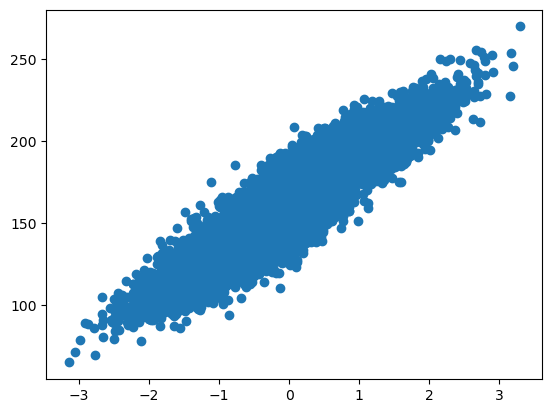

In [223]:
# Plot training data plot best fit line
plt.scatter(X_train,Y_train)

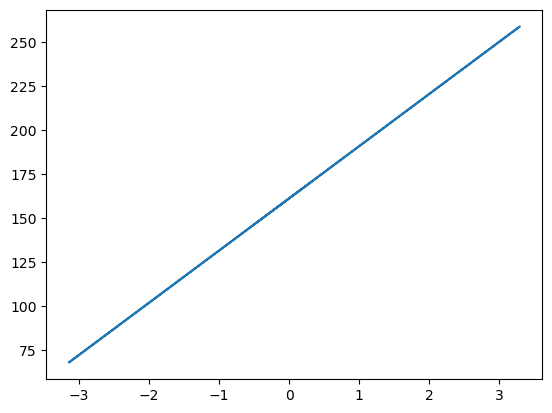

In [225]:
plt.plot(X_train,regression.predict(X_train))

### Prediction of test data
1. predicted height output = intercept + coef_(Weights)
2. y_pred_test=156.470+17.29(X_test)

In [228]:
# Prediction for test data
y_pred=regression.predict(X_test)
y_pred

array([178.57512515, 179.6647018 , 161.02321556, ..., 116.9258262 ,
       166.57680281, 170.20239759])

In [229]:
# Performance Metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [230]:
mse = mean_squared_error(Y_test,y_pred)
mae = mean_absolute_error(Y_test,y_pred)
rmse = np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

150.03552947905447
9.738938907381849
12.248899112942945


## R square
Formula

**R^2 = 1 - SSR/SST**

1. R^2 = coefficient of determination
2. SSR = sum of squares of residuals
3. *SST = total sum of squares

In [237]:
from sklearn.metrics import r2_score

In [239]:
score=r2_score(Y_test,y_pred)
print(score)

0.8566646540503119


**Adjusted R2 = 1 - [(1-R2)*(n-1)/(n-k-1)]**

where:

*R2 : The R2 of the model
*n : The number of observations
*k : The number of predictor variables

In [242]:
## Using OLS technique of Linear Regression
import statsmodels.api as sm

In [244]:
model=sm.OLS(Y_train,X_train).fit()

In [245]:
prediction = model.predict(X_test)
print(prediction)

[ 17.34436588  18.43394254  -0.2075437  ... -44.30493307   5.34604355
   8.97163833]


In [248]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.032
Model:                            OLS   Adj. R-squared (uncentered):              0.032
Method:                 Least Squares   F-statistic:                              251.3
Date:                Wed, 26 Feb 2025   Prob (F-statistic):                    1.09e-55
Time:                        11:00:52   Log-Likelihood:                         -48785.
No. Observations:                7500   AIC:                                  9.757e+04
Df Residuals:                    7499   BIC:                                  9.758e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [254]:
## Prediction for new data
regression.predict(scaler.transform([[72]]))

C:\Users\HP\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([203.97607055])